# Statistics in Python

This is a brief overview of statistics in python. In data science we always inspect our data using descriptive statistics and descriptive plots. Such statistics can be used of course for visualisations or dashboards as well. The statistical analysis can be done with a number of tests, depending on the characteristics of the data and the research question to be answered. This notebook refers to the most important ones

- Practical: [Descriptive statistics](#0)
- Graphical: [Descriptive plots](#1)
- Analytical: [Statistical analysis](#2)

In [1]:
#import libraries
import numpy as np
import pandas as pd
#import scipy 
#import statsmodels

<a name='0'></a>
## Descriptive statistics

Let us create some data for demonstration purpose. We will put the data in a pandas dataframe since pandas has some nice numpy methods built ins, like `mean()`, `sum()`, `max()`,`min()` etc. It can even deliver the descriptive statistics at once with `describe()`

In [2]:
#series of values with weights
x = [8.0, 1, 2.5, 4, 28.0]
w = [0.1, 0.2, 0.3, 0.25, 0.15]
X = pd.DataFrame({'measurement':x, 'weights':w})

In [3]:
print((1 + 2.5 + 4 + 8 + 28) / 5 )
print(X.measurement.mean())

8.7
8.7


In [4]:
print((1 + 2.5 + 4 + 8 + 28))
print(X.measurement.sum())

43.5
43.5


In [5]:
X.measurement.min()

1.0

In [6]:
X.measurement.max()

28.0

In [7]:
X.measurement.std()

11.099549540409285

In [8]:
X.measurement.median()

4.0

In [9]:
#weighted average
print((8 * 0.1 + 1 * 0.2 + 2.5 * 0.3 + 4 * 0.25 + 28 * 0.15))
print(np.average(X['measurement'], weights=X['weights']))

6.95
6.95


In [10]:
X.describe()

,measurement,weights
count,5.00000,5.000000
mean,8.70000,0.200000
std,11.09955,0.079057
min,1.00000,0.100000
25%,2.50000,0.150000
50%,4.00000,0.200000
75%,8.00000,0.250000
max,28.00000,0.300000


In [11]:
nice_table = X.describe().T.round(2)
nice_table[['count', 'mean', 'std']]

,count,mean,std
measurement,5.0,8.7,11.10
weights,5.0,0.2,0.08


<a name='1'></a>
## Decriptive plots

We can also use the built in plots for our explatory data analyses. Like `boxplot()`, `hist()`, `plot.kde()` or just `plot()`. Seaborn has some nice plots as well

<AxesSubplot:>

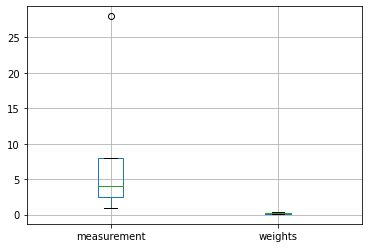

In [12]:
# boxplot for outlier check
X.boxplot()

<AxesSubplot:>

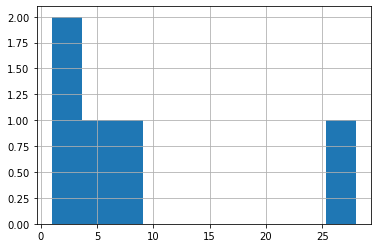

In [18]:
#check distribution of data
X['measurement'].hist()

<AxesSubplot:ylabel='Density'>

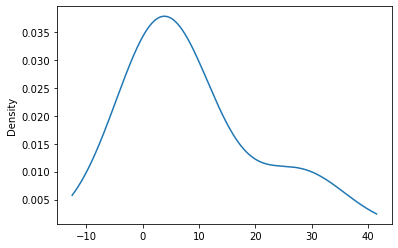

In [14]:
#check distribution for normality
X['measurement'].plot.kde()

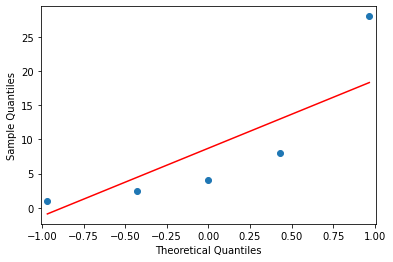

In [15]:
#check normality with qqplot
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
qqplot(X['measurement'], line='s')
pyplot.show()

<AxesSubplot:>

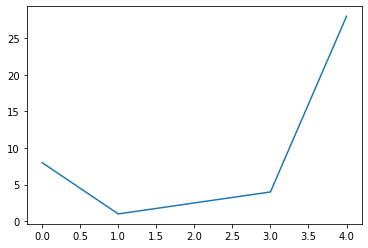

In [19]:
#plot to see time effect
X['measurement'].plot()

<a name='2'></a>
## Analytical statistics


### Normality check with Shapiro-Wilk Test

It is good practice to check for normality. The Shapiro-Wilk Test is a good test for checking normality

In [17]:
from scipy.stats import shapiro
# normality test
stat, p = shapiro(X['measurement'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.754, p=0.032
Sample does not look Gaussian (reject H0)


source: https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

### More statistics

There are a number of cheatsheets and tutorials on the internet. The next overview is a compact overview of tutorials

- https://www.kaggle.com/hamelg/python-for-data-21-descriptive-statistics
- https://www.kaggle.com/hamelg/python-for-data-22-probability-distributions
- https://www.kaggle.com/hamelg/python-for-data-23-confidence-intervals
- https://www.kaggle.com/hamelg/python-for-data-24-hypothesis-testing
- https://www.kaggle.com/hamelg/python-for-data-25-chi-squared-tests
- https://www.kaggle.com/hamelg/python-for-data-26-anova/notebook
- https://www.kaggle.com/hamelg/python-for-data-27-linear-regression